<a href="https://colab.research.google.com/github/Annmary2347211/NNDL/blob/main/2347211_NNDL_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Data Preprocessing

In [ ]:
data = pd.read_csv('/content/HistoricalQuotes.csv')

# Remove any leading or trailing whitespace from column names
data.columns = data.columns.str.strip()

# Focusing on the 'Close/Last' column
close_data = data['Close/Last'].str.replace('$', '').astype(float).values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
close_data_normalized = scaler.fit_transform(close_data)

# Split data into train and test sets
train_size = int(len(close_data_normalized) * 0.8)
train_data, test_data = close_data_normalized[:train_size], close_data_normalized[train_size:]

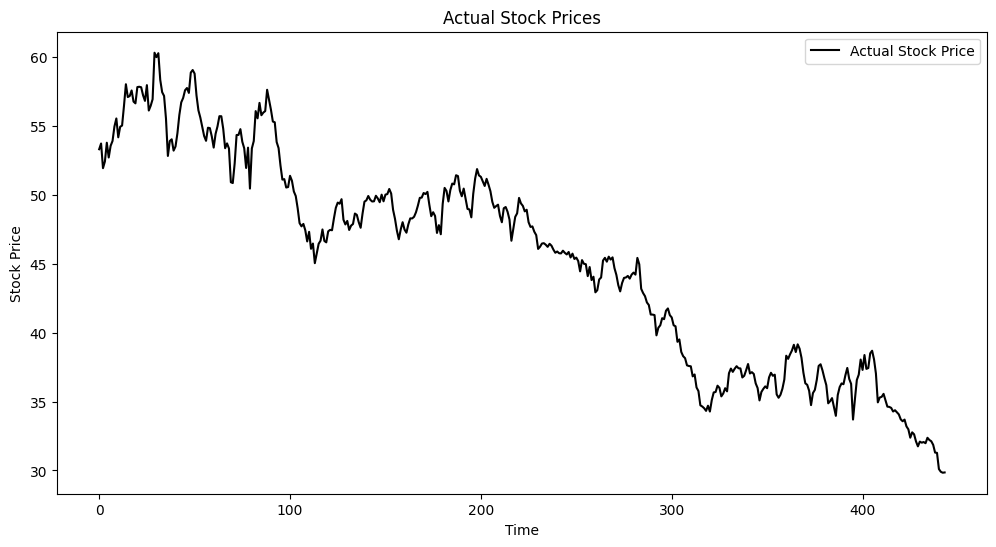

In [ ]:
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12,6))
plt.plot(actual_prices, color='black', label='Actual Stock Price')
plt.title('Actual Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Create Training Sequences

In [ ]:
def create_sequences(data, sequence_length=60):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 60
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build and train the RNN model

In [ ]:
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0872 - val_loss: 0.0030
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.0133e-04 - val_loss: 0.0010
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.3958e-04 - val_loss: 1.6606e-04
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.4132e-04 - val_loss: 6.5214e-05
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1718e-04 - val_loss: 6.1016e-05
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0842e-04 - val_loss: 5.5294e-05
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1946e-04 - val_loss: 6.5334e-05
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.3076e-04 - val_loss: 6.3579e-05
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.3020e-04 - val_loss: 5.2537e-05
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1480e-04 - val_loss: 5.1649e-05
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0489e-04 - val_loss: 5.1388e-05
Epoch 

# Predict stock prices on the test set

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


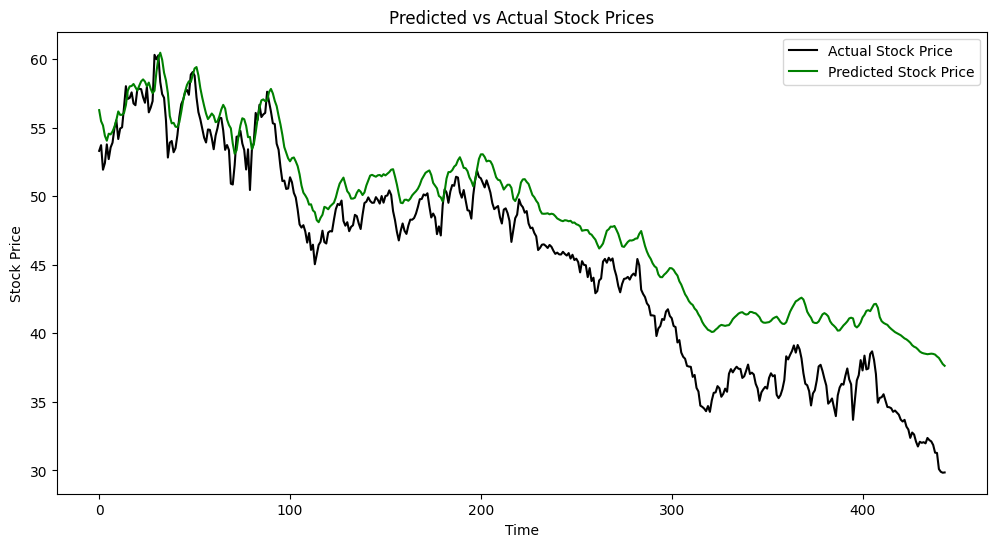

In [ ]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predicted vs. actual stock prices
plt.figure(figsize=(12,6))
plt.plot(actual_prices, color='black', label='Actual Stock Price')
plt.plot(predicted_prices, color='green', label='Predicted Stock Price')
plt.title('Predicted vs Actual Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate performance metrics


In [ ]:
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = math.sqrt(mean_squared_error(actual_prices, predicted_prices))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 3.007351950389415
Root Mean Squared Error (RMSE): 3.496834707279653
